# Analyzing world economies

In [1]:
!which python

/Users/eshaankirpal/miniforge3/envs/financials/bin/python


In [2]:
# !pip install wbgapi

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets

## Read the Data

In [2]:
DATAPATH='../assets'
FILENAME='WEOOct2023all.xlsx'

In [4]:
df=pd.read_excel(os.path.join(DATAPATH,FILENAME),engine='openpyxl')
#df_spain.rename({'Unnamed: 2':'Date'},axis=1,inplace=True)
#df_spain.set_index('Date', inplace=True)
print(df.shape)
df.head(30)

(8626, 59)


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1288.87,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1547.29,1232.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.136,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.007,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,120.05,120.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,39127.08,30315.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,2328.76,1804.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
8,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...,National currency,Units,"See notes for: Gross domestic product, curren...",NaN,...,46972.1,36585.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
9,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,...,611.268,443.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0


In [117]:
df['Country'].nunique()

196

In [118]:
df['Subject Descriptor'].nunique()

28

In [119]:
country_subjects=df['Subject Descriptor'].unique().tolist()
country_subjects

['Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product, deflator',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, current prices',
 'Output gap in percent of potential GDP',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
 'Implied PPP conversion rate',
 'Total investment',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Volume of imports of goods and services',
 'Volume of Imports of goods',
 'Volume of exports of goods and services',
 'Volume of exports of goods',
 'Unemployment rate',
 'Employment',
 'Population',
 'General government revenue',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',
 'General government net debt',
 'General government gross 

In [120]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "CÙte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guate

In [121]:
s=pd.Series(df.groupby('Country')['Subject Descriptor'].nunique())
s[s==28]

Country
Afghanistan           28
Albania               28
Algeria               28
Andorra               28
Angola                28
                      ..
Vietnam               28
West Bank and Gaza    28
Yemen                 28
Zambia                28
Zimbabwe              28
Name: Subject Descriptor, Length: 196, dtype: int64

In [122]:
s=df.groupby('Subject Descriptor')['Units'].nunique()
s.unique()

array([2, 1, 3])

In [123]:
s=df.groupby('Subject Descriptor')['Scale'].unique()
s

Subject Descriptor
Current account balance                                                               [Billions, nan]
Employment                                                                                 [Millions]
General government gross debt                                                         [Billions, nan]
General government net debt                                                           [Billions, nan]
General government net lending/borrowing                                              [Billions, nan]
General government primary net lending/borrowing                                      [Billions, nan]
General government revenue                                                            [Billions, nan]
General government structural balance                                                 [Billions, nan]
General government total expenditure                                                  [Billions, nan]
Gross domestic product based on purchasing-power-parity (PPP) s

In [124]:
df['WEO Country Code'].unique()

array([512, 914, 612, 171, 614, 311, 213, 911, 314, 193, 122, 912, 313,
       419, 513, 316, 913, 124, 339, 638, 514, 218, 963, 616, 223, 516,
       918, 748, 618, 624, 522, 622, 156, 626, 628, 228, 924, 233, 632,
       636, 634, 238, 662, 960, 423, 935, 128, 611, 321, 243, 248, 469,
       253, 642, 643, 939, 734, 644, 819, 172, 132, 646, 648, 915, 134,
       652, 174, 328, 258, 656, 654, 336, 263, 268, 532, 944, 176, 534,
       536, 429, 433, 178, 436, 136, 343, 158, 439, 916, 664, 826, 542,
       967, 443, 917, 544, 941, 446, 666, 668, 672, 946, 137, 546, 674,
       676, 548, 556, 678, 181, 867, 682, 684, 273, 868, 921, 948, 943,
       686, 688, 518, 728, 836, 558, 138, 196, 278, 692, 694, 962, 142,
       449, 564, 565, 283, 853, 288, 293, 566, 964, 182, 359, 453, 968,
       922, 714, 862, 135, 716, 456, 722, 942, 718, 724, 576, 936, 961,
       813, 726, 199, 733, 184, 524, 361, 362, 364, 732, 366, 144, 146,
       463, 528, 923, 738, 578, 537, 742, 866, 369, 744, 186, 92

## Clean data

In [125]:
df[df['WEO Country Code']=='International Monetary Fund, World Economic Outlook Database, October 2023']

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
8625,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.drop(8625,axis=0,inplace=True)
df['WEO Country Code'].unique()

array([512, 914, 612, 171, 614, 311, 213, 911, 314, 193, 122, 912, 313,
       419, 513, 316, 913, 124, 339, 638, 514, 218, 963, 616, 223, 516,
       918, 748, 618, 624, 522, 622, 156, 626, 628, 228, 924, 233, 632,
       636, 634, 238, 662, 960, 423, 935, 128, 611, 321, 243, 248, 469,
       253, 642, 643, 939, 734, 644, 819, 172, 132, 646, 648, 915, 134,
       652, 174, 328, 258, 656, 654, 336, 263, 268, 532, 944, 176, 534,
       536, 429, 433, 178, 436, 136, 343, 158, 439, 916, 664, 826, 542,
       967, 443, 917, 544, 941, 446, 666, 668, 672, 946, 137, 546, 674,
       676, 548, 556, 678, 181, 867, 682, 684, 273, 868, 921, 948, 943,
       686, 688, 518, 728, 836, 558, 138, 196, 278, 692, 694, 962, 142,
       449, 564, 565, 283, 853, 288, 293, 566, 964, 182, 359, 453, 968,
       922, 714, 862, 135, 716, 456, 722, 942, 718, 724, 576, 936, 961,
       813, 726, 199, 733, 184, 524, 361, 362, 364, 732, 366, 144, 146,
       463, 528, 923, 738, 578, 537, 742, 866, 369, 744, 186, 92

In [127]:
df[df['WEO Country Code'].isna()]

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
8624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.drop(8624,axis=0,inplace=True)
df['WEO Country Code'].unique()

array([512, 914, 612, 171, 614, 311, 213, 911, 314, 193, 122, 912, 313,
       419, 513, 316, 913, 124, 339, 638, 514, 218, 963, 616, 223, 516,
       918, 748, 618, 624, 522, 622, 156, 626, 628, 228, 924, 233, 632,
       636, 634, 238, 662, 960, 423, 935, 128, 611, 321, 243, 248, 469,
       253, 642, 643, 939, 734, 644, 819, 172, 132, 646, 648, 915, 134,
       652, 174, 328, 258, 656, 654, 336, 263, 268, 532, 944, 176, 534,
       536, 429, 433, 178, 436, 136, 343, 158, 439, 916, 664, 826, 542,
       967, 443, 917, 544, 941, 446, 666, 668, 672, 946, 137, 546, 674,
       676, 548, 556, 678, 181, 867, 682, 684, 273, 868, 921, 948, 943,
       686, 688, 518, 728, 836, 558, 138, 196, 278, 692, 694, 962, 142,
       449, 564, 565, 283, 853, 288, 293, 566, 964, 182, 359, 453, 968,
       922, 714, 862, 135, 716, 456, 722, 942, 718, 724, 576, 936, 961,
       813, 726, 199, 733, 184, 524, 361, 362, 364, 732, 366, 144, 146,
       463, 528, 923, 738, 578, 537, 742, 866, 369, 744, 186, 92

In [129]:
incorrect_names=set()
dual_names=set()
def rename_country_name(country_code,country):
    try:
        search_result=pycountry.countries.search_fuzzy(country_code)
        if len(search_result)==1:
            new_name=search_result[0].name
        else:
            search_result2=pycountry.countries.search_fuzzy(country)
            if len(search_result2)==1:
                new_name=search_result2[0].name
            else:
                dual_names.add(country_code)
                new_name=country
         
    except:
        incorrect_names.add(country_code)
        new_name=country
    return new_name

df['Country']=df.apply(lambda x: rename_country_name(x.ISO,x.Country),axis=1)
df['Country'].unique()

SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=No

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia, Plurinational State of',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, The Democratic Republic of the', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
    

In [130]:
dual_names

{'ABW',
 'CHN',
 'DMA',
 'ESP',
 'GEO',
 'GIN',
 'IND',
 'IRL',
 'KOR',
 'LUX',
 'MEX',
 'NER',
 'OMN',
 'PER',
 'PRI',
 'USA'}

In [131]:
incorrect_names

{'KNA', 'LAO', 'LCA', 'STP', 'TUR', 'UVK', 'WBG'}

In [159]:
fuzzy_search_word='PRK'
pycountry.countries.search_fuzzy(fuzzy_search_word)

[Country(alpha_2='KP', alpha_3='PRK', common_name='North Korea', flag='🇰🇵', name="Korea, Democratic People's Republic of", numeric='408', official_name="Democratic People's Republic of Korea")]

In [150]:
country_names={'St. Lucia':'Saint Lucia',
              'S„o TomÈ and PrÌncipe':'Sao Tome and Principe',
              'Lao P.D.R.':'Laos',
              'Korea':'South Korea',
              'St. Kitts and Nevis':'Saint Kitts and Nevis',
               'T¸rkiye':'Türkiye'
              }

df['Country'].replace(country_names,inplace=True)
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia, Plurinational State of',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, The Democratic Republic of the', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
    

In [160]:
# df.loc[df['ISO']=='KOR','Country']='South Korea'
df.loc[df['ISO']=='PRK']

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After


## 

In [18]:
country=['China','United States','Japan','India', 'Germany','Netherlands','Spain']
subject='Gross domestic product, current prices'
units='U.S. dollars'
df_tmp=df[(df['Country'].isin(country)) & (df['Subject Descriptor']==subject) & (df['Units']==units)]
estimate_year=int(df_tmp.loc[df_tmp.index[0],'Estimates Start After'])
df_tmp

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
1587,924,CHN,NGDPD,China,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",303.004,...,14862.56,17759.31,17886.33,17700.9,18560.01,19781.7,21059.83,22291.05,23608.86,2022.0
2819,134,DEU,NGDPD,Germany,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",853.705,...,3884.62,4281.35,4085.68,4429.84,4700.88,4960.29,5181.79,5327.94,5459.26,2022.0
3391,534,IND,NGDPD,India,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",189.438,...,2671.6,3150.31,3389.69,3732.22,4105.38,4511.85,4951.62,5427.39,5944.38,2023.0
3743,158,JPN,NGDPD,Japan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1127.88,...,5050.68,5011.87,4237.53,4230.86,4286.19,4524.63,4710.14,4873.16,5157.93,2022.0
5415,138,NLD,NGDPD,Netherlands,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",193.758,...,909.065,1030.36,1010.19,1092.75,1157.91,1207.53,1254.38,1295.41,1338.2,2022.0
7043,184,ESP,NGDPD,Spain,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",230.759,...,1277.11,1446.61,1418.92,1582.05,1676.54,1751.94,1816.05,1870.32,1926.17,2022.0
8187,111,USA,NGDPD,United States,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2857.33,...,21060.45,23315.08,25462.73,26949.64,27966.55,29048.89,30223.88,31428.87,32690.37,2022.0


In [19]:
num_cols=np.arange(1980,2028).tolist()
cols_to_keep=['Country']+ num_cols
df_tmp=df_tmp[cols_to_keep]
df_tmp

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
1587,China,303.004,288.699,284.601,305.428,314.23,310.133,300.92,327.728,408.663,...,13841.81,14340.6,14862.56,17759.31,17886.33,17700.9,18560.01,19781.7,21059.83,22291.05
2819,Germany,853.705,718.264,693.547,691.912,651.9,661.037,944.124,1174.86,1266.62,...,3976.25,3889.61,3884.62,4281.35,4085.68,4429.84,4700.88,4960.29,5181.79,5327.94
3391,India,189.438,196.535,203.537,222.049,215.556,237.618,252.751,283.75,299.645,...,2702.93,2835.61,2671.6,3150.31,3389.69,3732.22,4105.38,4511.85,4951.62,5427.39
3743,Japan,1127.88,1243.79,1157.6,1268.62,1345.2,1427.35,2121.25,2584.34,3134.18,...,5040.88,5118,5050.68,5011.87,4237.53,4230.86,4286.19,4524.63,4710.14,4873.16
5415,Netherlands,193.758,162.4,157.338,153.179,142.578,144.655,201.599,246.928,264.223,...,914.458,910.295,909.065,1030.36,1010.19,1092.75,1157.91,1207.53,1254.38,1295.41
7043,Spain,230.759,204.588,197.643,172.856,172.381,181.62,251.304,318.389,374.068,...,1422.35,1394.47,1277.11,1446.61,1418.92,1582.05,1676.54,1751.94,1816.05,1870.32
8187,United States,2857.33,3207.03,3343.8,3634.03,4037.65,4339,4579.63,4855.25,5236.43,...,20533.08,21380.95,21060.45,23315.08,25462.73,26949.64,27966.55,29048.89,30223.88,31428.87


In [20]:
df_tmp=df_tmp.rename({'Country':''},axis=1)
df_tmp=df_tmp.set_index('')
df_tmp=df_tmp.T.reset_index()
df_tmp=df_tmp.rename({'index':'Year'},axis=1)
df_tmp

,Year,China,Germany,India,Japan,Netherlands,Spain,United States
0,1980,303.004,853.705,189.438,1127.88,193.758,230.759,2857.33
1,1981,288.699,718.264,196.535,1243.79,162.4,204.588,3207.03
2,1982,284.601,693.547,203.537,1157.6,157.338,197.643,3343.8
3,1983,305.428,691.912,222.049,1268.62,153.179,172.856,3634.03
4,1984,314.23,651.9,215.556,1345.2,142.578,172.381,4037.65
5,1985,310.133,661.037,237.618,1427.35,144.655,181.62,4339
6,1986,300.92,944.124,252.751,2121.25,201.599,251.304,4579.63
7,1987,327.728,1174.86,283.75,2584.34,246.928,318.389,4855.25
8,1988,408.663,1266.62,299.645,3134.18,264.223,374.068,5236.43
9,1989,458.18,1257.39,301.234,3117.07,260.532,412.59,5641.6


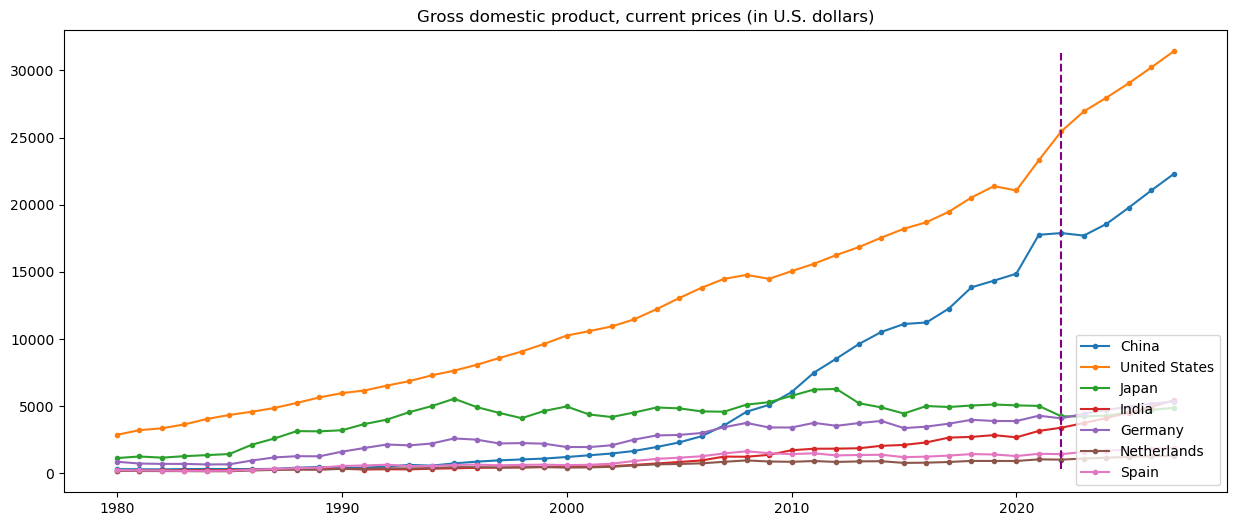

In [21]:
plt.figure(figsize=(15,6))
for c in country:
    plt.plot(df_tmp['Year'],df_tmp[c],'.-',label=c)

plt.title(subject +' (in '+units+')')
#var='Gross national savings'
#plt.plot(df_tmp['Year'],df_tmp[var],'*-',label=var)

#var='Current account balance'
#plt.plot(df_spain['Year'],df_spain[var],'.-',label=var)

#var='Current Account Balance-Predictions'
#plt.plot(df_spain['Year'],df_spain[var],'--',label=var)

#plt.axhline(y = 0, xmin = 0, xmax = 0.95, color = 'black', drawstyle='steps',linestyle='dotted')
#plt.axvline(x = 2004, ymin = 0.05, ymax = 0.95, color = 'pink', drawstyle='steps',linestyle='dashed')
#plt.axvline(x = 2012, ymin = 0.05, ymax = 0.95, color = 'pink', drawstyle='steps',linestyle='dashed')
#plt.axvline(x = 2013, ymin = 0.05, ymax = 0.95, color = 'red', drawstyle='steps',linestyle='dashed')
#plt.axvline(x = 2018, ymin = 0.05, ymax = 0.95, color = 'red', drawstyle='steps',linestyle='dashed')
plt.axvline(x = estimate_year, ymin = 0.05, ymax = 0.95, color = 'purple', drawstyle='steps',linestyle='dashed')

#plt.annotate('Period 1',xy=(2010,30),color='pink')
#plt.annotate('Period 2',xy=(2015,30),color='red')
#plt.annotate('Projections',xy=(2025,30),color='purple')

plt.legend(loc='lower right')
plt.show()

## Save to file

In [162]:
FILENAME='WEO_Oct2023_country_region.xlsx'
df.to_excel(os.path.join(DATAPATH,FILENAME))

## Analyzing Economic Groups

In [1]:
FILENAME='WEO_Data-groups.xlsx'
df_groups=pd.read_excel(os.path.join(DATAPATH,FILENAME),engine='openpyxl')
print(df_groups.shape)
df_groups.head()

NameError: name 'pd' is not defined

In [30]:
df_groups['Country Group Name'].unique()

array(['World', 'Advanced economies', 'Euro area',
       'Major advanced economies (G7)',
       'Other advanced economies (Advanced economies excluding G7 and euro area)',
       'European Union', 'ASEAN-5',
       'Emerging market and developing economies',
       'Emerging and developing Asia', 'Emerging and developing Europe',
       'Latin America and the Caribbean', 'Middle East and Central Asia',
       'Sub-Saharan Africa'], dtype=object)

In [31]:
df_groups[df_groups['Country Group Name'].isna()]

,WEO Country Group Code,Country Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After


In [8]:
df_groups.drop([1664,1665],axis=0,inplace=True)
df_groups[df_groups['Country Group Name'].isna()]

,WEO Country Group Code,Country Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After


In [9]:
df_groups['WEO Country Group Code'].unique()

array([1, 110, 163, 119, 123, 998, 510, 200, 505, 903, 205, 400, 603],
      dtype=object)

In [32]:
set(df_groups['WEO Country Group Code'].unique()).intersection(set(df['WEO Country Code'].unique()))

set()

In [33]:
set(df_groups['WEO Country Group Code'].unique()).difference(set(df['WEO Country Code'].unique()))

{1, 110, 119, 123, 163, 200, 205, 400, 505, 510, 603, 903, 998}

In [34]:
df_groups['Subject Descriptor'].nunique()

116

In [35]:
df_groups.groupby('Country Group Name')['Subject Descriptor'].nunique()

Country Group Name
ASEAN-5                                                                     116
Advanced economies                                                          116
Emerging and developing Asia                                                116
Emerging and developing Europe                                              116
Emerging market and developing economies                                    116
Euro area                                                                   116
European Union                                                              116
Latin America and the Caribbean                                             116
Major advanced economies (G7)                                               116
Middle East and Central Asia                                                116
Other advanced economies (Advanced economies excluding G7 and euro area)    116
Sub-Saharan Africa                                                          116
World                

In [212]:
region_subjects=df_groups['Subject Descriptor'].unique().tolist()
region_subjects

['Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product, deflator',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, current prices',
 'Output gap',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
 'Investment',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Trade volume of goods and services',
 'Volume of imports of goods and services',
 'Volume of imports of goods',
 'Volume of exports of goods and services',
 'Volume of exports of goods',
 'Terms of trade of goods and services',
 'Terms of trade of goods',
 'Export price of manufactures',
 'Unemployment rate',
 'Employment',
 'General government revenue',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',

In [36]:
s=df_groups.groupby('Subject Descriptor')['Units'].nunique()
s.unique()

array([1, 2, 3])

In [38]:
s=df_groups.groupby('Subject Descriptor')['Scale'].nunique()
s.unique()

array([1, 0])

In [37]:
df_groups.columns

Index([       'WEO Country Group Code',            'Country Group Name',
                  'Subject Descriptor',                 'Subject Notes',
                               'Units',                         'Scale',
       'Country/Series-specific Notes',                            1980,
                                  1981,                            1982,
                                  1983,                            1984,
                                  1985,                            1986,
                                  1987,                            1988,
                                  1989,                            1990,
                                  1991,                            1992,
                                  1993,                            1994,
                                  1995,                            1996,
                                  1997,                            1998,
                                  1999,            

In [38]:
df.columns

Index([             'WEO Country Code',                           'ISO',
                    'WEO Subject Code',                       'Country',
                  'Subject Descriptor',                 'Subject Notes',
                               'Units',                         'Scale',
       'Country/Series-specific Notes',                            1980,
                                  1981,                            1982,
                                  1983,                            1984,
                                  1985,                            1986,
                                  1987,                            1988,
                                  1989,                            1990,
                                  1991,                            1992,
                                  1993,                            1994,
                                  1995,                            1996,
                                  1997,            

In [63]:
 set(df.columns) - set(df_groups.columns)

{'Country', 'ISO', 'WEO Country Code', 'WEO Subject Code'}

In [205]:
df_groups.rename({'Country Group Name':'Country/Group Name','WEO Country Group Code':'WEO Country/Group Code'},axis=1,inplace=True)
df_groups.head()

,WEO Country/Group Code,Country/Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,1,World,"Gross domestic product, constant prices",NaN,Percent change,NaN,NaN,2.151,2.052,0.694,...,-2.803,6.337,3.482,2.964,2.941,3.198,3.203,3.141,3.066,NaN
1,1,World,"Gross domestic product, constant prices",NaN,Percent change (market exchange rates),NaN,NaN,1.697,2.073,0.486,...,-3.208,6.129,3.038,2.532,2.414,2.699,2.721,2.646,2.570,NaN
2,1,World,"Gross domestic product, current prices",NaN,U.S. dollars,Billions,NaN,11232.069,11526.241,11310.303,...,84960.903,96487.666,100135.361,104476.432,109734.270,115598.839,121580.994,127499.667,133782.888,NaN
3,1,World,"Gross domestic product, current prices",NaN,Purchasing power parity; international dollars,Billions,NaN,13401.939,14988.046,15971.455,...,133451.759,148174.764,163837.197,174789.867,183947.224,193602.077,203624.971,213802.005,224380.471,NaN
4,1,World,"Gross domestic product, deflator",NaN,"Index, 2000=100",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.rename({'Country':'Country/Group Name','WEO Country Code':'WEO Country/Group Code'},axis=1,inplace=True)
df.head()

,WEO Country/Group Code,ISO,WEO Subject Code,Country/Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1288.87,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1547.29,1232.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.136,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.007,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0


In [69]:
df_groups['ISO']=None
df_groups['WEO Subject Code']=None

In [71]:
print(df_groups.shape,df.shape)

(1664, 59) (8624, 59)


In [76]:
df_merged=pd.concat([df,df_groups],axis=0,ignore_index=True)
print(df_merged.shape)
df_merged.tail()

(10288, 59)


,WEO Country/Group Code,ISO,WEO Subject Code,Country/Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
10283,603,None,None,Sub-Saharan Africa,"Tin, standard grade, LME spot price, US$ per m...",NaN,U.S. dollars,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10284,603,None,None,Sub-Saharan Africa,"Nickel, melting grade, LME spot price, CIF Eur...",NaN,U.S. dollars,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10285,603,None,None,Sub-Saharan Africa,"Zinc, high grade 98% pure, US$ per metric tonne",NaN,U.S. dollars,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10286,603,None,None,Sub-Saharan Africa,"Lead, 99.97% pure, LME spot price, CIF Europea...",NaN,U.S. dollars,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10287,603,None,None,Sub-Saharan Africa,"Uranium, u3o8 restricted price, Nuexco exchang...",NaN,U.S. dollars,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_merged['Subject Descriptor'].isna().sum()

0

In [80]:
df_merged['Units'].isna().sum()

0

In [81]:
df_merged['Subject']= df_merged[['Subject Descriptor','Units']].apply(lambda x : '{} [{}]'.format(x[0],x[1]), axis=1)
df_merged.head()

,WEO Country/Group Code,ISO,WEO Subject Code,Country/Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After,Subject
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,"Gross domestic product, constant prices [Natio..."
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,"Gross domestic product, constant prices [Perce..."
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1232.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,"Gross domestic product, current prices [Nation..."
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,"Gross domestic product, current prices [U.S. d..."
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,"Gross domestic product, current prices [Purcha..."


In [ ]:
cols_to_keep=[]

In [87]:
FILENAME='WEO_Oct2023_country_region.xlsx'
df_merged.to_excel(os.path.join(DATAPATH,FILENAME))

### World Groups-Breakdown


Tasks to do:

1. Separate the subjects for regions vs countries - Done
2. Add leaflet.js map highlighting all countries within a region
3. Create and compare stats for regions, such as GDP, GDP per capita, Unemployment, Inflation, etc
4. Rank the top and bottom most economies and contrast them against world's Top and bottom most countries
5. 


"""
Tasks for Macroeconomy analysis tool:

1. Analyze population data and draw Population Pyramid (Source: US Census Bureau)
2. Compare GDP per capita vs Area Size
3. Categorize economic indicators into digestable sections 
4. Incorporate Bar chart visualization optionality with all line charts
5. Add statistical process control analysis tool optionality to all charts
6. Add description/guidance for each page
7. Perform rellgion-level comparative analysis
8. Deploy the app - Done
9. Add to Github - DONE
10. Analyze country's Institutional Environment Indicators such as 
    Ease of Doing Business Index (Source: US World Bank)
11. Integrate app with World bank APIs
12. Make Philip's curve plot "(Inflation rate vs Unemployment rate)
"""

In [164]:
FILENAME='economic-regions.xlsx'
df_regions=pd.read_excel(os.path.join(DATAPATH,FILENAME),engine='openpyxl')
print(df_regions.shape)
df_regions

(12, 2)


,Region_name,Countries
0,Advanced Economies,"Andorra, Australia, Austria, Belgium, Canada, ..."
1,Euro Area,"Austria, Belgium, Croatia, Cyprus, Estonia, Fi..."
2,Major Advanced Economies (G7),"Canada, France, Germany, Italy, Japan, United ..."
3,Other Advanced Economies \n(Advanced Economies...,"Andorra, Australia, Czech Republic, Denmark, H..."
4,European Union,"Austria, Belgium, Bulgaria, Croatia, Cyprus, C..."
5,ASEAN-5,"Indonesia, Malaysia, Philippines, Singapore, T..."
6,Emerging market and developing economies,"Afghanistan, Albania, Algeria, Angola, Antigua..."
7,Emerging and developing Asia,"Bangladesh, Bhutan, Brunei Darussalam, Cambodi..."
8,Emerging and developing Europe,"Albania, Belarus, Bosnia and Herzegovina, Bulg..."
9,Latin America and the Caribbean,"Antigua and Barbuda, Argentina, Aruba, The Bah..."


In [165]:
df_regions

,Region_name,Countries
0,Advanced Economies,"Andorra, Australia, Austria, Belgium, Canada, ..."
1,Euro Area,"Austria, Belgium, Croatia, Cyprus, Estonia, Fi..."
2,Major Advanced Economies (G7),"Canada, France, Germany, Italy, Japan, United ..."
3,Other Advanced Economies \n(Advanced Economies...,"Andorra, Australia, Czech Republic, Denmark, H..."
4,European Union,"Austria, Belgium, Bulgaria, Croatia, Cyprus, C..."
5,ASEAN-5,"Indonesia, Malaysia, Philippines, Singapore, T..."
6,Emerging market and developing economies,"Afghanistan, Albania, Algeria, Angola, Antigua..."
7,Emerging and developing Asia,"Bangladesh, Bhutan, Brunei Darussalam, Cambodi..."
8,Emerging and developing Europe,"Albania, Belarus, Bosnia and Herzegovina, Bulg..."
9,Latin America and the Caribbean,"Antigua and Barbuda, Argentina, Aruba, The Bah..."


In [166]:
df.head(10)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1288.87,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1547.29,1232.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.136,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.007,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,120.05,120.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,39127.08,30315.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,2328.76,1804.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
8,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...,National currency,Units,"See notes for: Gross domestic product, curren...",NaN,...,46972.1,36585.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
9,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,...,611.268,443.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0


In [167]:
df_regions['country_count']=df_regions['Countries'].apply(lambda x: len(x.split(',')))
df_regions

,Region_name,Countries,country_count
0,Advanced Economies,"Andorra, Australia, Austria, Belgium, Canada, ...",41
1,Euro Area,"Austria, Belgium, Croatia, Cyprus, Estonia, Fi...",20
2,Major Advanced Economies (G7),"Canada, France, Germany, Italy, Japan, United ...",7
3,Other Advanced Economies \n(Advanced Economies...,"Andorra, Australia, Czech Republic, Denmark, H...",17
4,European Union,"Austria, Belgium, Bulgaria, Croatia, Cyprus, C...",27
5,ASEAN-5,"Indonesia, Malaysia, Philippines, Singapore, T...",5
6,Emerging market and developing economies,"Afghanistan, Albania, Algeria, Angola, Antigua...",155
7,Emerging and developing Asia,"Bangladesh, Bhutan, Brunei Darussalam, Cambodi...",30
8,Emerging and developing Europe,"Albania, Belarus, Bosnia and Herzegovina, Bulg...",15
9,Latin America and the Caribbean,"Antigua and Barbuda, Argentina, Aruba, The Bah...",33


In [172]:
region_name="Sub-Saharan Africa"
selected_countries=df_regions[df_regions["Region_name"]==region_name]['Countries'].values[0].replace(', ',',').replace(' ,',',').split(',')
print("Selected Countries: ",selected_countries)

Selected Countries:  ['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo', "Côte d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']


In [173]:
df_selected_region=df[df['Country'].isin(selected_countries)]
print(df_selected_region.shape)
df_selected_region.tail()

(1892, 59)


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,1164.36,1905.21,12102.06,106757.86,269963.93,575420.93,1007634.58,1513701.5,1763004.39,2021.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,84.365,59.769,98.449,95.435,56.944,52.201,48.213,48.416,42.699,2021.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,1380.14,3187.63,12292.67,111864.93,474084.1,1102309.64,2089955.6,3126416.82,4128929.25,2021.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.678,0.348,0.321,0.28,-0.317,-0.411,-0.466,-0.512,-0.55,2022.0
8623,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,2.521,0.968,1.019,0.863,-0.673,-0.827,-0.922,-1.081,-1.12,2022.0


In [174]:
df_selected_region['Country'].nunique()

43

In [175]:
set(selected_countries).difference(set(df_selected_region['Country'].unique()))

{"Côte d'Ivoire", 'São Tomé and Príncipe'}

In [163]:
df[df['Country']=='Islamic Republic of Iran']

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
3476,429,IRN,NGDP_R,Islamic Republic of Iran,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: Central Bank. The accuracy of data bef...,4890831.57,...,14557101.62,15244164.46,15819881,16290744.91,16696075.37,17029996.88,17370394.39,17717313.43,18071323.22,2023.0
3477,429,IRN,NGDP_RPCH,Islamic Republic of Iran,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",-21.6,...,3.33,4.72,3.777,2.976,2.488,2,1.999,1.997,1.998,2023.0
3478,429,IRN,NGDP,Islamic Republic of Iran,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: Central Bank. The accuracy of data bef...,6891.35,...,40791376.86,66774502.84,104350050,158024577.21,213468438.95,270230575.67,342462505.56,435782404.28,558666462.35,2023.0
3479,429,IRN,NGDPD,Islamic Republic of Iran,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",95.846,...,195.528,289.294,346.479,366.438,386.218,401.186,416.548,433.566,454.495,2023.0
3480,429,IRN,PPPGDP,Islamic Republic of Iran,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",225.953,...,1330.37,1455.74,1616.54,1725.87,1808.89,1882.25,1957.13,2032.72,2111.75,2023.0
3481,429,IRN,NGDP_D,Islamic Republic of Iran,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",0.141,...,280.216,438.033,659.613,970.027,1278.56,1586.79,1971.53,2459.64,3091.45,2023.0
3482,429,IRN,NGDPRPC,Islamic Republic of Iran,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",124477146.68,...,173220467.11,179678369.55,184617986.98,188230661.46,191003993.71,192895122.36,194802704.9,196726016.59,198670099.73,2021.0
3483,429,IRN,NGDPRPPPPC,Islamic Republic of Iran,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",10772.53,...,14990.88,15549.76,15977.25,16289.9,16529.91,16693.57,16858.66,17025.1,17193.35,2021.0
3484,429,IRN,NGDPPC,Islamic Republic of Iran,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...,National currency,Units,"See notes for: Gross domestic product, curren...",175392.54,...,485392047.15,787050929.09,1217764923.3,1825887696.48,2442090338.99,3060843775.96,3840593420.44,4838754861.05,6141792743.42,2021.0
3485,429,IRN,NGDPDPC,Islamic Republic of Iran,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2439.4,...,2326.66,3409.83,4043.41,4233.99,4418.35,4544.14,4671.44,4814.14,4996.57,2021.0
